In [37]:
import pandas as pd
import numpy as np

mmgData = pd.read_csv('mammographic_masses.data.txt',header = None, na_values = '?')
mmgData.head()

,0,1,2,3,4,5
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [16]:
column_names = ["BI_RADS", "Age", "Shape", "Margin", "Density", "Severity"]
mmgData.columns = column_names
mmgData.head()

,BI_RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [17]:
mmgData.describe()

,BI_RADS,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [18]:
mmgData[mmgData.isna().any(axis = 1)]

,BI_RADS,Age,Shape,Margin,Density,Severity
1,4.0,43.0,1.0,1.0,NaN,1
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
...,...,...,...,...,...,...
778,4.0,60.0,NaN,4.0,3.0,0
819,4.0,35.0,3.0,NaN,2.0,0
824,6.0,40.0,NaN,3.0,4.0,1
884,5.0,NaN,4.0,4.0,3.0,1


In [19]:
mmgData = mmgData.dropna()
mmgData.describe()


,BI_RADS,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [20]:
Features    = mmgData[['Age', 'Shape', 'Margin', 'Density']].values
Class       = mmgData['Severity'].values

FeatureName = ['Age', 'Shape', 'Margin', 'Density']

Features


array([[67.,  3.,  5.,  3.],
       [58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

In [38]:
from sklearn.preprocessing import StandardScaler

Scaler         = StandardScaler()
FeaturesScaled = Scaler.fit(Features)
FeaturesScaled = Scaler.transform(Features)

#Scale each element in the numpy array to have mean 0 and SD 1
FeaturesScaled

array([[ 0.7650629 ,  0.17563638,  1.39618483,  0.24046607],
       [ 0.15127063,  0.98104077,  1.39618483,  0.24046607],
       [-1.89470363, -1.43517241, -1.157718  ,  0.24046607],
       ...,
       [ 0.56046548,  0.98104077,  1.39618483,  0.24046607],
       [ 0.69686376,  0.98104077,  1.39618483,  0.24046607],
       [ 0.42406719,  0.17563638,  0.11923341,  0.24046607]])

## Train / Test

In [39]:
from sklearn.model_selection import train_test_split
np.random.seed(1234)

X_trainF, X_testF, Y_trainC, Y_testC = train_test_split(FeaturesScaled, Class, test_size = 0.25,random_state = 1)

## Decision Tree

In [40]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 1)
clf = clf.fit(X_trainF, Y_trainC)

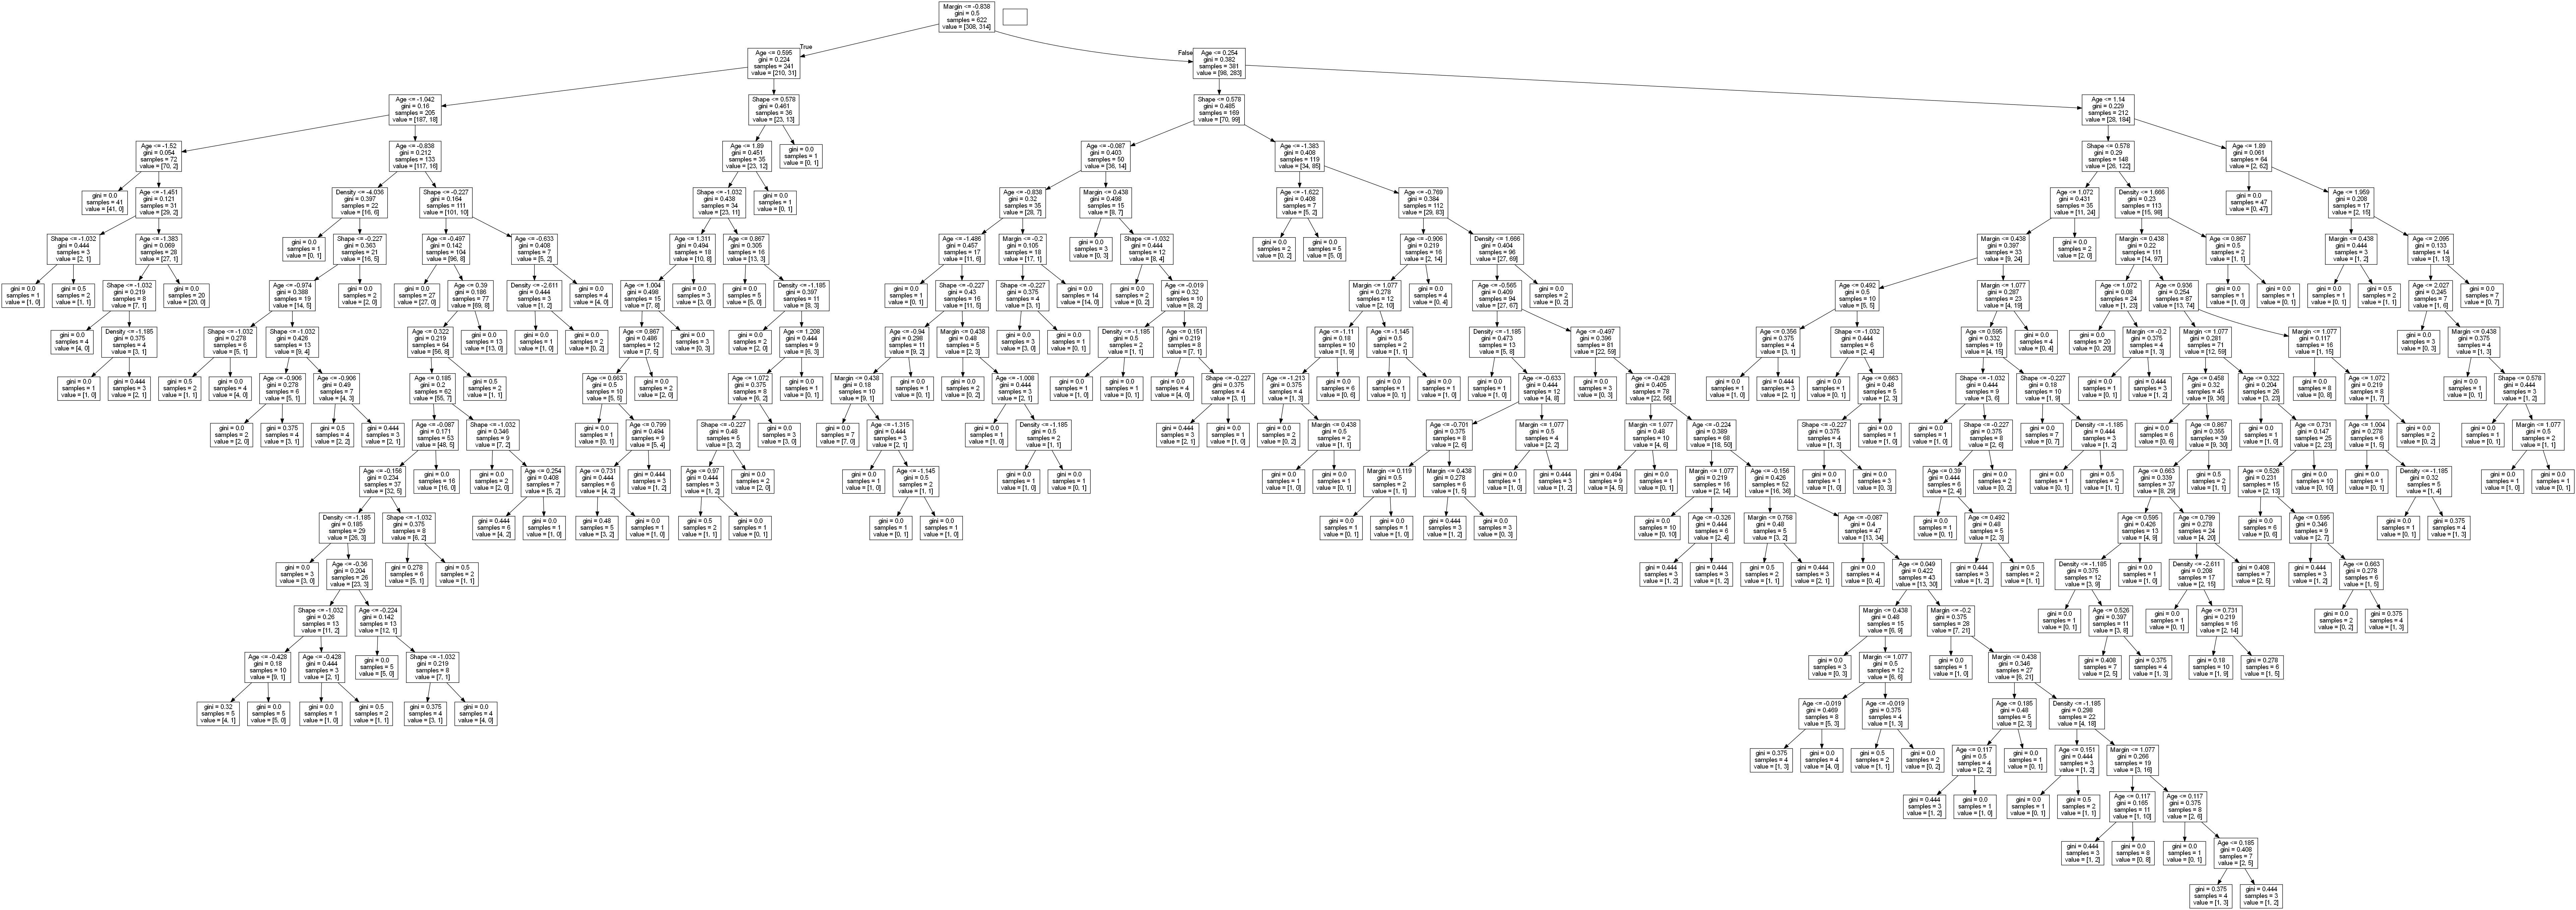

In [41]:
from IPython.display import Image
from six import StringIO
import pydotplus

dot_data = StringIO()
tree.export_graphviz(clf, out_file = dot_data,
                            feature_names = FeatureName)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [42]:
from sklearn import metrics

y_pred = clf.predict(X_testF)
print("Accuracy:", metrics.accuracy_score(Y_testC,y_pred))

Accuracy: 0.7355769230769231


In [43]:
#Alternative way to calculate accuracy

clf.score(X_testF,Y_testC)

0.7355769230769231

In [45]:
from sklearn.model_selection import cross_val_score

clf = tree.DecisionTreeClassifier(random_state = 1)

Scores = cross_val_score(clf, FeaturesScaled, Class, cv = 10)
print(Scores.mean())

0.7373493975903613


## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators = 10, random_state = 1)
Scores = cross_val_score(clf, FeaturesScaled, Class, cv = 10)
print(Scores.mean())

0.7421686746987952


## SVM

In [47]:
#With Single train/test
from sklearn import svm

clf = svm.SVC(kernel = 'linear', C = 1).fit(X_trainF, Y_trainC)

clf.score(X_testF, Y_testC)

0.7692307692307693

In [48]:
#With Multiple Train/test
clf = svm.SVC(kernel = 'linear', C = 1)
Scores = cross_val_score(clf, FeaturesScaled, Class, cv = 10)

print(Scores.mean())


0.7975903614457832


## KNN (K-Nearest-Neighbors)

In [49]:
#Single Train Test
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors = 10)
neigh.fit(X_trainF, Y_trainC)

y_pred = neigh.predict(X_testF)
print("Accuracy:", metrics.accuracy_score(Y_testC,y_pred))

Accuracy: 0.7692307692307693


In [50]:
neigh = KNeighborsClassifier(n_neighbors = 10)
Scores = cross_val_score(neigh, FeaturesScaled, Class, cv = 10)
print(Scores.mean())

0.7927710843373494


In [51]:
#Single Train/test
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(X_trainF, Y_trainC)

    y_pred = neigh.predict(X_testF)
    print(i,"Accuracy:", metrics.accuracy_score(Y_testC,y_pred))

1 Accuracy: 0.7259615384615384
2 Accuracy: 0.75
3 Accuracy: 0.7548076923076923
4 Accuracy: 0.7355769230769231
5 Accuracy: 0.7740384615384616
6 Accuracy: 0.7596153846153846
7 Accuracy: 0.7788461538461539
8 Accuracy: 0.7740384615384616
9 Accuracy: 0.7788461538461539
10 Accuracy: 0.7692307692307693
11 Accuracy: 0.7644230769230769
12 Accuracy: 0.7644230769230769
13 Accuracy: 0.7451923076923077
14 Accuracy: 0.75
15 Accuracy: 0.75
16 Accuracy: 0.75
17 Accuracy: 0.75
18 Accuracy: 0.75
19 Accuracy: 0.7596153846153846
20 Accuracy: 0.7644230769230769
21 Accuracy: 0.7596153846153846
22 Accuracy: 0.7644230769230769
23 Accuracy: 0.7596153846153846
24 Accuracy: 0.7692307692307693
25 Accuracy: 0.7596153846153846
26 Accuracy: 0.7596153846153846
27 Accuracy: 0.7596153846153846
28 Accuracy: 0.75
29 Accuracy: 0.7596153846153846
30 Accuracy: 0.7644230769230769
31 Accuracy: 0.7644230769230769
32 Accuracy: 0.7596153846153846
33 Accuracy: 0.7644230769230769
34 Accuracy: 0.7692307692307693
35 Accuracy: 0.7644

In [52]:
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i)
    Scores = cross_val_score(neigh, FeaturesScaled, Class, cv = 10)
    print(i,Scores.mean())

1 0.7228915662650601
2 0.6855421686746987
3 0.7530120481927711
4 0.7385542168674699
5 0.7783132530120482
6 0.7650602409638554
7 0.7975903614457832
8 0.7819277108433734
9 0.7927710843373493
10 0.7927710843373494
11 0.7951807228915662
12 0.7843373493975905
13 0.7843373493975904
14 0.7855421686746988
15 0.7855421686746988
16 0.7831325301204819
17 0.7867469879518072
18 0.7783132530120482
19 0.7855421686746988
20 0.7843373493975904
21 0.7867469879518072
22 0.783132530120482
23 0.7795180722891566
24 0.7771084337349399
25 0.7855421686746988
26 0.7831325301204819
27 0.7843373493975904
28 0.7843373493975904
29 0.7867469879518072
30 0.7843373493975904
31 0.7867469879518072
32 0.789156626506024
33 0.7867469879518072
34 0.789156626506024
35 0.7843373493975904
36 0.7867469879518072
37 0.7831325301204819
38 0.7867469879518072
39 0.7819277108433734
40 0.7843373493975904
41 0.7819277108433734
42 0.7831325301204819
43 0.7831325301204819
44 0.7843373493975904
45 0.7831325301204819
46 0.7831325301204819


## Naive-Bayes

In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
classifier = MultinomialNB()
MMScaler   = MinMaxScaler()
FeatureMMScaled = MMScaler.fit(Features)
FeatureMMScaled = MMScaler.transform(Features)

Scores = cross_val_score(classifier,FeatureMMScaled,Class, cv = 10)

Scores.mean()

0.7855421686746988

## SVM

In [54]:
clf = svm.SVC(kernel = 'poly', C = 1)
Scores = cross_val_score(clf, FeaturesScaled, Class, cv = 10)
Scores.mean()

0.7903614457831326

In [55]:
clf = svm.SVC(kernel = 'rbf', C = 1)
Scores = cross_val_score(clf, FeaturesScaled, Class, cv = 10)
Scores.mean()

0.8012048192771084

In [56]:
clf = svm.SVC(kernel = 'sigmoid', C = 1)
Scores = cross_val_score(clf, FeaturesScaled, Class, cv = 10)
Scores.mean()

0.7457831325301204

## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 1)
scores = cross_val_score(clf,FeaturesScaled,Class,cv = 10)
scores.mean()

0.8072289156626505

## XGBoost

In [58]:
#Using XGBoost
import xgboost as xgb
model = xgb.XGBClassifier(learning_rate = 0.05, eta = 0.3, max_depth = 3)
Scores = cross_val_score(model,FeaturesScaled,Class, cv = 10)
Scores.mean()


0.8012048192771084